<center>
# Final Project Part 2
# Feng Wang
# Gibbs Sampling 

In [17]:
from numpy import *
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

# 1. Inverse Algorithm and Main function

From the marginal distribution, we have the density function, cumulative and inverse function 

<center>
$$f(x|y) = \frac{1}{1-e^{-By}}ye^{-yx},  F(x|y) = \frac{1-e^{-yx}}{1-e^{-By}},      x \in [0,B]$$  
$$f(y|x) = \frac{1}{1-e^{-Bx}}xe^{-yx},  F(y|x) = \frac{1-e^{-yx}}{1-e^{-Bx}},      y \in [0,B]$$  
$$F^{-1}(x|y) = -\frac{log(1-t(1-e^{-By}))}{y},  F^{-1}(y|x) = -\frac{log(1-t(1-e^{-Bx}))}{x}$$  

In [27]:
def Fxy(x, y, B):return (1 - exp(- y * x))/(1 - exp(- B * y))
def Fyx(x, y, B):return (1 - exp(- y * x))/(1 - exp(- B * x))
def F_1x(y, B):
    temp = random.uniform(0, 1)
    return -(log(1 - temp * (1 - exp(- B * y))))/y
def F_1y(x, B):
    temp = random.uniform(0, 1)
    return -(log(1 - temp * (1 - exp(- B * x))))/x

## Inverse method Algorithm
1. Assign initial value x = 1, y = 1  
2. Generate new x given y, and generate new y given x, using the inverse function
3. Repeat step b iteration times

## Main function

In [19]:
def Invsample(N, thin, B):
    mat = zeros(3 * N).reshape(N, 3)
    mat[:, 0] = arange(1, N+1, 1)
    x = 1; y = 1; 
    for i in range(0, N):
        for j in range(0, thin):
            x = F_1x(y, B)
            y = F_1y(x, B)
        mat[i, 1 : 3] = [x, y]   
    return(mat)

# 2. Test for different sample sizes

###  B = 5, N = 500 

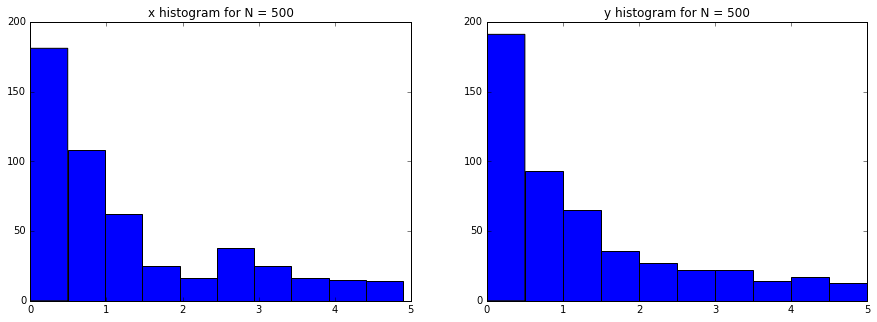

In [22]:
N = 500; thin = 5; B = 5
result1 = Invsample(N, thin, B)
fig = plt.figure(figsize=(15, 5))
plt.subplot("121")
plt.hist(result1[:,1])
plt.title("x histogram for N = 500")
plt.subplot("122")
plt.hist(result1[:,2])
plt.title("y histogram for N = 500")

###  B = 5, N = 5000

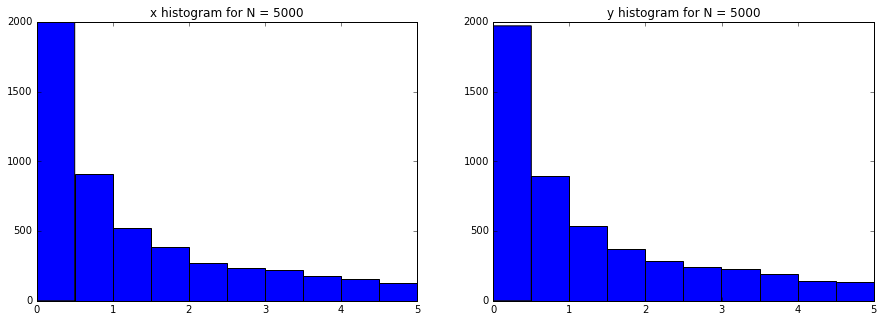

In [24]:
N = 5000; thin = 5; B = 5
result2 = Invsample(N, thin, B)
fig = plt.figure(figsize=(15, 5))
plt.subplot("121")
plt.hist(result2[:,1])
plt.title("x histogram for N = 5000")
plt.subplot("122")
plt.hist(result2[:,2])
plt.title("y histogram for N = 5000")

###  B = 5, N = 50000 

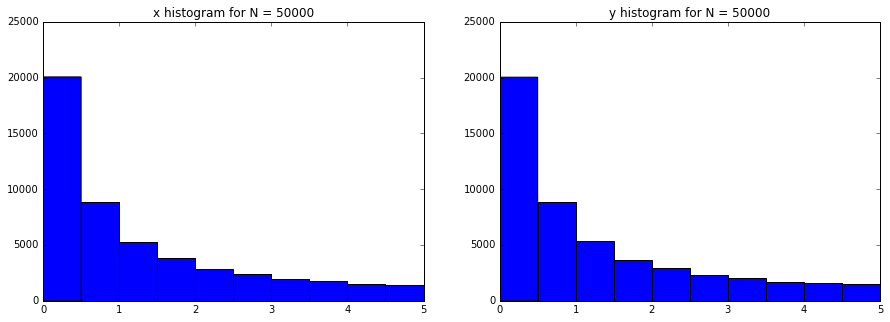

In [25]:
N = 50000; thin = 5; B = 5
result3 = Invsample(N, thin, B)
fig = plt.figure(figsize=(15, 5))
plt.subplot("121")
plt.hist(result3[:,1])
plt.title("x histogram for N = 50000")
plt.subplot("122")
plt.hist(result3[:,2])
plt.title("y histogram for N = 50000")

# 3. Estimate of the Expectation $E_{P(X)}[X]$

In [29]:
e1 = result1[:, 1]; e2 = result2[:, 1]; e3 = result3[:, 1]
print "N = 500",'The estimate of the Expectation is', mean(e1)
print "N = 5000",'The estimate of the Expectation is', mean(e2)
print "N = 50000",'The estimate of the Expectation is', mean(e3)

N = 500 The estimate of the Expectation is 1.27279499747
N = 5000 The estimate of the Expectation is 1.25477807499
N = 50000 The estimate of the Expectation is 1.25844594755


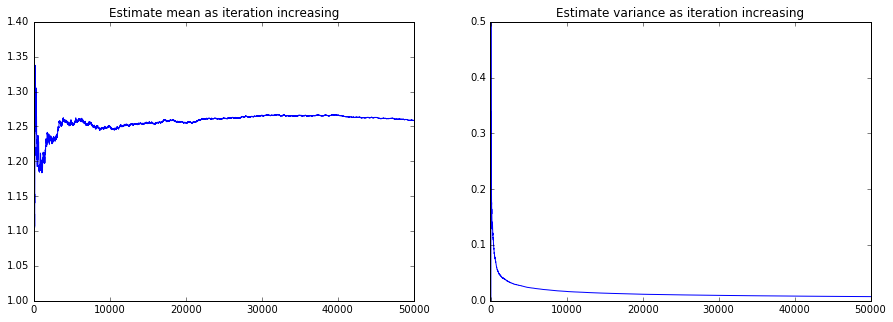

In [59]:
m = zeros(50000); v = zeros(50000)
for i in range(50000):
    m[i] = mean(result3[0:i+1,1])
    v[i] = var(result3[0:i+1,1])/sqrt(i+1)

fig = plt.figure(figsize=(15, 5))
plt.subplot("121")
plt.plot(m)
plt.axis([0, 50000, 1.0, 1.4])
plt.title("Estimate mean as iteration increasing")
plt.subplot("122")
plt.plot(v)
plt.axis([-100, 50000, 0, 0.5])
plt.title("Estimate variance as iteration increasing")